In [32]:
import numpy as np
import pandas as pd
import mlrose

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set_style('darkgrid')

## Eight Queens & Company

In [104]:
def queens_max(state):
    
    # Initialize counter
    fitness = 0
    
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                
                # If no attacks, then increment counter
                fitness += 1

    return fitness

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

In [191]:
problem = mlrose.DiscreteOpt(length=25, fitness_fn=fitness, maximize=True, max_val=25)
init_state = np.random.randint(0,25,25)
schedule = mlrose.ExpDecay()

In [192]:
algos = ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic']
df = pd.DataFrame()

best_rh = []
best_sa = []
best_ga = []
best_mimic = []
rng = range(1,16)

for i in rng:
    best_state_rh, best_fitness_rh = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_ga, best_fitness_ga = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i)
    best_state_mimic, best_fitness_mimic = mlrose.mimic(problem, max_attempts=100, max_iters=i)
    
    best_rh.append(best_fitness_rh)
    best_sa.append(best_fitness_sa)
    best_ga.append(best_fitness_ga)
    best_mimic.append(best_fitness_mimic)
    
df['Iterations'] = rng
df['Random Hill Climb Fitness'] = best_rh
df['Simulated Annealing Fitness'] = best_sa
df['Genetic Algorithm Fitness'] = best_ga
df['MIMIC Fitness'] = best_mimic

df

,Iterations,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
0,1,272.0,271.0,288.0,289.0
1,2,272.0,272.0,289.0,291.0
2,3,275.0,275.0,291.0,292.0
3,4,277.0,274.0,290.0,291.0
4,5,275.0,275.0,289.0,293.0
5,6,276.0,272.0,290.0,294.0
6,7,283.0,275.0,292.0,292.0
7,8,276.0,272.0,292.0,292.0
8,9,281.0,275.0,290.0,294.0
9,10,282.0,276.0,290.0,292.0


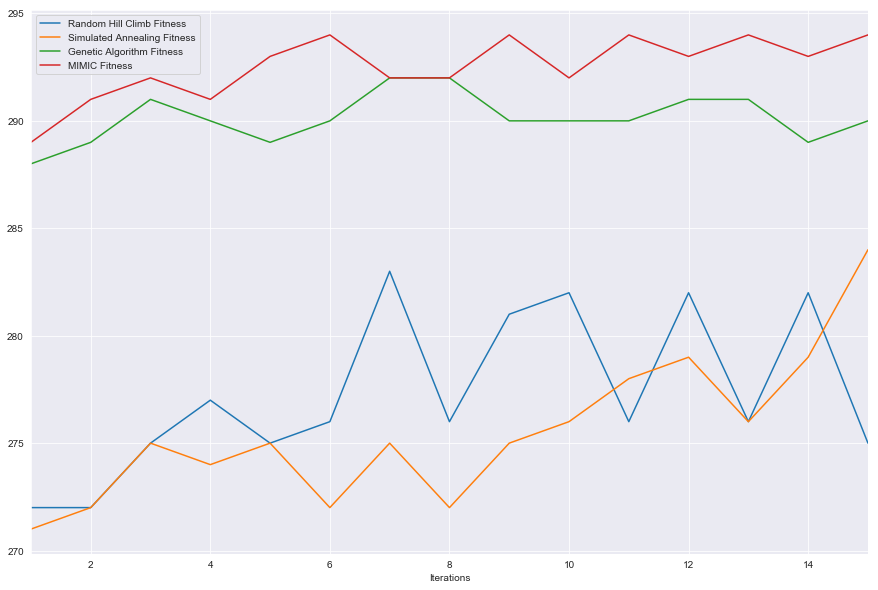

In [193]:
df.plot(figsize=(15,10), x='Iterations')

## [Stealing] Traveling Salesman

In [516]:
np.random.seed(42)
coords_list = [np.array([np.random.randint(1,101), np.random.randint(1,101)]) for i in range(25)]
coords_list = np.unique(coords_list, axis=0)[:20]
coords_list

array([[ 2, 64],
       [ 2, 88],
       [ 3, 51],
       [ 7, 21],
       [15, 62],
       [15, 72],
       [22, 53],
       [24,  3],
       [30, 38],
       [33, 76],
       [42, 92],
       [52, 93],
       [55, 64],
       [58, 22],
       [60, 21],
       [60, 80],
       [61, 21],
       [62, 47],
       [62, 51],
       [73, 39]])

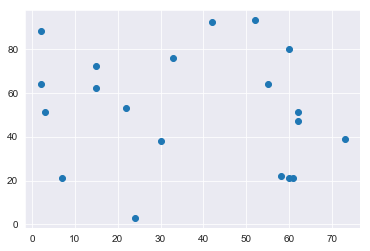

In [517]:
x = [coord[0] for coord in coords_list]
y = [coord[1] for coord in coords_list]

plt.scatter(x,y)
#plt.plot(x,y)

In [518]:
def pocketed_ff_miles(state):
    if len(state) != len(set(state)):
        return 0
    dist = 0
    for i in range(len(state) - 1):
        dist += np.linalg.norm(coords_list[state[i+1]] - coords_list[state[i]])
    max_dist = np.sqrt(2*(100**2)) * 20
    return max_dist - dist
fitness_cust = mlrose.CustomFitness(pocketed_ff_miles, 'tsp')

In [519]:
problem = mlrose.TSPOpt(length=20, fitness_fn=fitness_cust, maximize=True)

In [520]:
init_state=range(20)

In [459]:
algos = ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic']
df = pd.DataFrame()

best_rh = []
best_sa = []
best_ga = []
best_mimic = []
rng = range(10,201,10)

for i in rng:
    np.random.seed(42)
    best_state_rh, best_fitness_rh = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_ga, best_fitness_ga = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i)
    best_state_mimic, best_fitness_mimic = mlrose.mimic(problem, max_attempts=100, max_iters=i)
    
    best_rh.append(best_fitness_rh)
    best_sa.append(best_fitness_sa)
    best_ga.append(best_fitness_ga)
    best_mimic.append(best_fitness_mimic)
    
df['Iterations'] = rng
df['Random Hill Climb Fitness'] = best_rh
df['Simulated Annealing Fitness'] = best_sa
df['Genetic Algorithm Fitness'] = best_ga
df['MIMIC Fitness'] = best_mimic

df

,Iterations,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
0,10,2291.242745,2297.308730,2234.509707,2282.963642
1,20,2291.242745,2292.745752,2274.709537,2247.879494
2,30,2295.517957,2359.222357,2280.549452,2346.797973
3,40,2333.302545,2361.937505,2274.720256,2257.512316
4,50,2356.954456,2311.650919,2239.074044,2301.918393
5,60,2377.900707,2346.183350,2272.428403,2297.942356
6,70,2377.900707,2336.290351,2291.412335,2260.237680
7,80,2377.900707,2327.995623,2346.411718,2312.275074
8,90,2377.900707,2359.747943,2296.632665,2278.441323
9,100,2377.900707,2329.490749,2256.173915,2264.517740


In [494]:
df.index = df['Iterations']
df.drop('Iterations', axis=1, inplace=True)
df

,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
Iterations,,,,
10,2291.242745,2297.308730,2234.509707,2282.963642
20,2291.242745,2292.745752,2274.709537,2247.879494
30,2295.517957,2359.222357,2280.549452,2346.797973
40,2333.302545,2361.937505,2274.720256,2257.512316
50,2356.954456,2311.650919,2239.074044,2301.918393
60,2377.900707,2346.183350,2272.428403,2297.942356
70,2377.900707,2336.290351,2291.412335,2260.237680
80,2377.900707,2327.995623,2346.411718,2312.275074
90,2377.900707,2359.747943,2296.632665,2278.441323


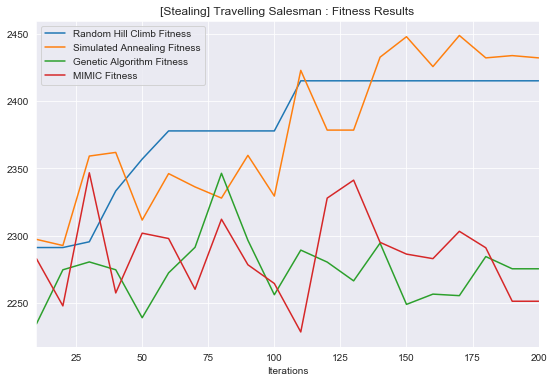

In [463]:
df.plot(x='Iterations', title='[Stealing] Travelling Salesman : Fitness Results', figsize=(9,6))

In [467]:
best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=170, init_state=init_state)

In [468]:
best_state_sa

array([ 3,  4,  5,  1,  0,  2,  6,  8, 12,  9, 10, 11, 15, 18, 17, 19, 16,
       13,  7, 14])

In [469]:
for val in list(best_state_sa):
    print(coords_list[val])

[ 7 21]
[15 62]
[15 72]
[ 2 88]
[ 2 64]
[ 3 51]
[22 53]
[30 38]
[55 64]
[33 76]
[42 92]
[52 93]
[60 80]
[62 51]
[62 47]
[73 39]
[61 21]
[58 22]
[24  3]
[60 21]


In [489]:
travel_order = [list(coords_list[val]) for val in best_state_sa]
travel_order.append(travel_order[0])
to_x = [to[0] for to in travel_order]
to_y = [to[1] for to in travel_order]

In [490]:
travel_order

[[7, 21],
 [15, 62],
 [15, 72],
 [2, 88],
 [2, 64],
 [3, 51],
 [22, 53],
 [30, 38],
 [55, 64],
 [33, 76],
 [42, 92],
 [52, 93],
 [60, 80],
 [62, 51],
 [62, 47],
 [73, 39],
 [61, 21],
 [58, 22],
 [24, 3],
 [60, 21],
 [7, 21]]

Text(0.5, 1.0, 'Simulated Annealing Optimal Solution')

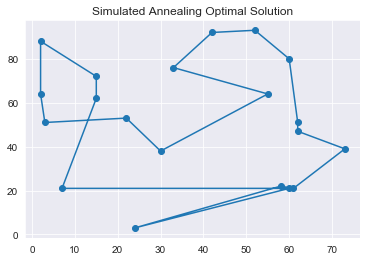

In [492]:
plt.scatter(x,y)
plt.plot(to_x, to_y)
plt.title('Simulated Annealing Optimal Solution')

Text(0.5, 1.0, 'Travelling Salesman Setup')

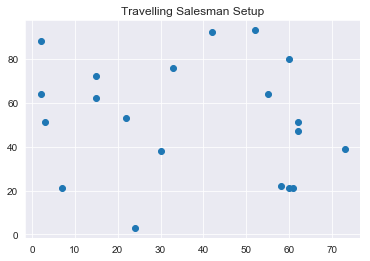

In [493]:
plt.scatter(x,y)
plt.title('Travelling Salesman Setup')

In [523]:
df = pd.DataFrame()

best_geom = []
best_arith = []
best_exp = []
rng = range(10,201,10)

for i in rng:
    np.random.seed(42)
    best_state_geom, best_fitness_geom = mlrose.simulated_annealing(problem, schedule=mlrose.GeomDecay(), max_attempts=100, max_iters=i, init_state=init_state)
    best_state_arith, best_fitness_arith = mlrose.simulated_annealing(problem, schedule=mlrose.ArithDecay(), max_attempts=100, max_iters=i, init_state=init_state)
    best_state_exp, best_fitness_exp = mlrose.simulated_annealing(problem, schedule=mlrose.ExpDecay(), max_attempts=100, max_iters=i, init_state=init_state)

    
    best_geom.append(best_fitness_geom)
    best_arith.append(best_fitness_arith)
    best_exp.append(best_fitness_exp)
    
df['Iterations'] = rng
df['Geometric Decay'] = best_geom
df['Arithmetic Decay'] = best_arith
df['Exponential Decay'] = best_exp

df

,Iterations,Geometric Decay,Arithmetic Decay,Exponential Decay
0,10,2320.664933,2272.851416,2275.245897
1,20,2318.270452,2279.181975,2394.701138
2,30,2318.270452,2362.011426,2307.265003
3,40,2324.451080,2394.701138,2326.204571
4,50,2342.040087,2363.949767,2305.715903
5,60,2342.040087,2337.294090,2287.509534
6,70,2342.040087,2336.290351,2379.638373
7,80,2375.810343,2356.226240,2444.979785
8,90,2375.810343,2357.763230,2433.865656
9,100,2375.810343,2342.339809,2398.094543


In [524]:
df.index = df['Iterations']
df.drop('Iterations', axis=1, inplace=True)
df

,Geometric Decay,Arithmetic Decay,Exponential Decay
Iterations,,,
10,2320.664933,2272.851416,2275.245897
20,2318.270452,2279.181975,2394.701138
30,2318.270452,2362.011426,2307.265003
40,2324.451080,2394.701138,2326.204571
50,2342.040087,2363.949767,2305.715903
60,2342.040087,2337.294090,2287.509534
70,2342.040087,2336.290351,2379.638373
80,2375.810343,2356.226240,2444.979785
90,2375.810343,2357.763230,2433.865656


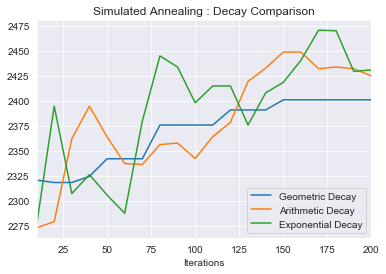

In [526]:
df.plot(title='Simulated Annealing : Decay Comparison')

#### Max K-Color

In [258]:
edges = [(np.random.randint(0,10), np.random.randint(0,10)) for i in range(10)]
fitness = mlrose.MaxKColor(edges)
problem = mlrose.DiscreteOpt(length=10, fitness_fn=fitness, maximize=True)
init_state = np.zeros(10)
schedule = mlrose.ExpDecay()

In [259]:
algos = ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic']
df = pd.DataFrame()

best_rh = []
best_sa = []
best_ga = []
best_mimic = []
rng = range(1,16)

for i in rng:
    best_state_rh, best_fitness_rh = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_ga, best_fitness_ga = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i)
    best_state_mimic, best_fitness_mimic = mlrose.mimic(problem, max_attempts=100, max_iters=i)
    
    best_rh.append(best_fitness_rh)
    best_sa.append(best_fitness_sa)
    best_ga.append(best_fitness_ga)
    best_mimic.append(best_fitness_mimic)
    
df['Iterations'] = rng
df['Random Hill Climb Fitness'] = best_rh
df['Simulated Annealing Fitness'] = best_sa
df['Genetic Algorithm Fitness'] = best_ga
df['MIMIC Fitness'] = best_mimic

df

,Iterations,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
0,1,8.0,8.0,7.0,8.0
1,2,8.0,8.0,8.0,8.0
2,3,8.0,7.0,8.0,8.0
3,4,8.0,6.0,8.0,8.0
4,5,8.0,7.0,8.0,8.0
5,6,8.0,8.0,8.0,8.0
6,7,8.0,8.0,8.0,8.0
7,8,8.0,8.0,8.0,8.0
8,9,8.0,7.0,8.0,8.0
9,10,8.0,8.0,8.0,8.0


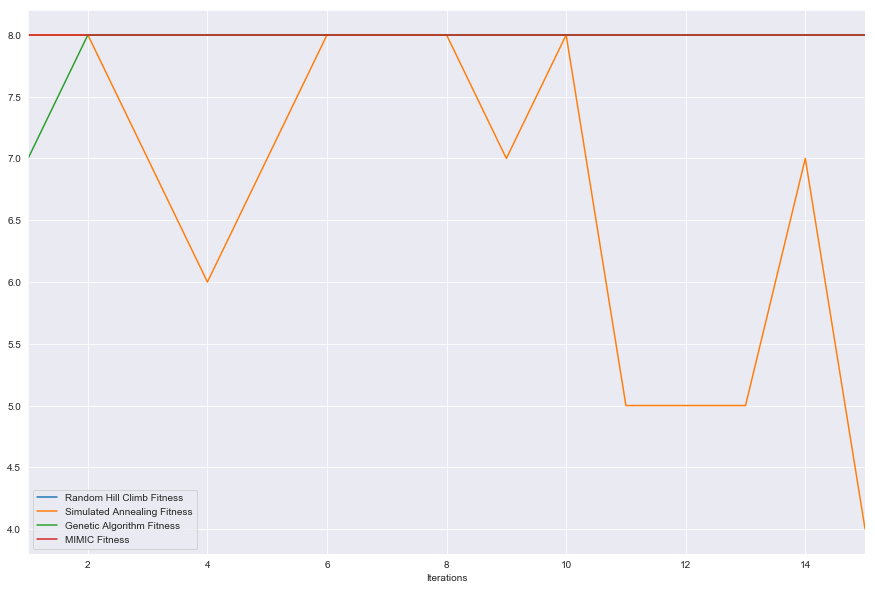

In [260]:
df.plot(figsize=(15,10), x='Iterations')

#### Four Peaks

In [243]:
fitness = mlrose.FourPeaks()#t_pct=0.15)

In [244]:
problem = mlrose.DiscreteOpt(length=25, fitness_fn=fitness, maximize=True)
init_state = np.zeros(25)
schedule = mlrose.ExpDecay()

In [245]:
algos = ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic']
df = pd.DataFrame()

best_rh = []
best_sa = []
best_ga = []
best_mimic = []
rng = range(1,16)

for i in rng:
    best_state_rh, best_fitness_rh = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_ga, best_fitness_ga = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i)
    best_state_mimic, best_fitness_mimic = mlrose.mimic(problem, max_attempts=100, max_iters=i)
    
    best_rh.append(best_fitness_rh)
    best_sa.append(best_fitness_sa)
    best_ga.append(best_fitness_ga)
    best_mimic.append(best_fitness_mimic)
    
df['Iterations'] = rng
df['Random Hill Climb Fitness'] = best_rh
df['Simulated Annealing Fitness'] = best_sa
df['Genetic Algorithm Fitness'] = best_ga
df['MIMIC Fitness'] = best_mimic

df

,Iterations,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
0,1,25.0,25.0,30.0,31.0
1,2,25.0,25.0,32.0,30.0
2,3,25.0,25.0,32.0,43.0
3,4,25.0,25.0,34.0,39.0
4,5,25.0,25.0,35.0,41.0
5,6,25.0,25.0,36.0,34.0
6,7,25.0,25.0,38.0,42.0
7,8,25.0,25.0,39.0,45.0
8,9,25.0,25.0,37.0,45.0
9,10,25.0,25.0,38.0,44.0


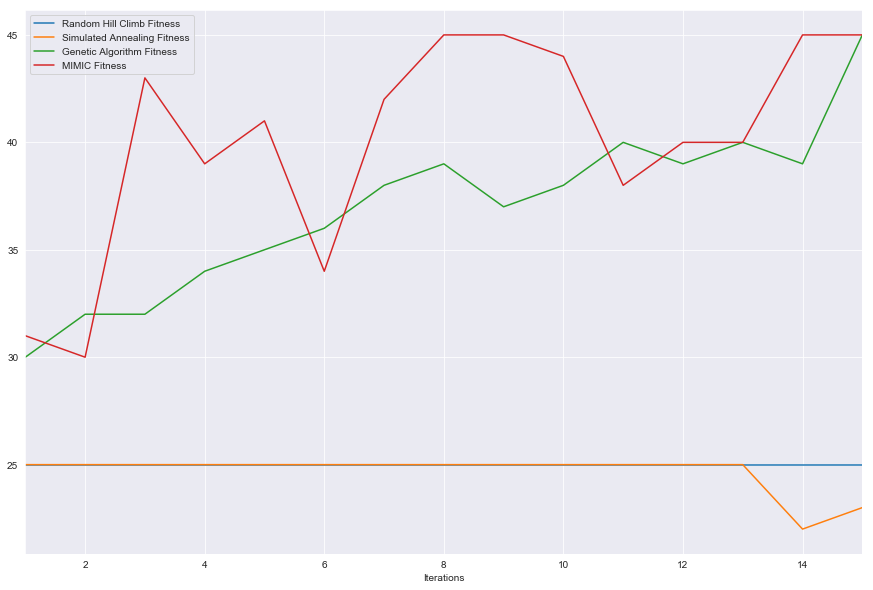

In [246]:
df.plot(figsize=(15,10), x='Iterations')

#### Six Peaks

In [247]:
fitness = mlrose.SixPeaks()

In [248]:
problem = mlrose.DiscreteOpt(length=25, fitness_fn=fitness, maximize=True)
init_state = np.zeros(25)
schedule = mlrose.ExpDecay()

In [249]:
algos = ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic']
df = pd.DataFrame()

best_rh = []
best_sa = []
best_ga = []
best_mimic = []
rng = range(1,16)

for i in rng:
    best_state_rh, best_fitness_rh = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_ga, best_fitness_ga = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i)
    best_state_mimic, best_fitness_mimic = mlrose.mimic(problem, max_attempts=100, max_iters=i)
    
    best_rh.append(best_fitness_rh)
    best_sa.append(best_fitness_sa)
    best_ga.append(best_fitness_ga)
    best_mimic.append(best_fitness_mimic)
    
df['Iterations'] = rng
df['Random Hill Climb Fitness'] = best_rh
df['Simulated Annealing Fitness'] = best_sa
df['Genetic Algorithm Fitness'] = best_ga
df['MIMIC Fitness'] = best_mimic

df

,Iterations,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
0,1,25.0,25.0,32.0,33.0
1,2,25.0,25.0,34.0,33.0
2,3,25.0,25.0,37.0,40.0
3,4,25.0,25.0,35.0,39.0
4,5,25.0,25.0,34.0,38.0
5,6,25.0,25.0,37.0,46.0
6,7,25.0,25.0,45.0,42.0
7,8,25.0,25.0,39.0,45.0
8,9,25.0,20.0,38.0,46.0
9,10,25.0,25.0,39.0,45.0


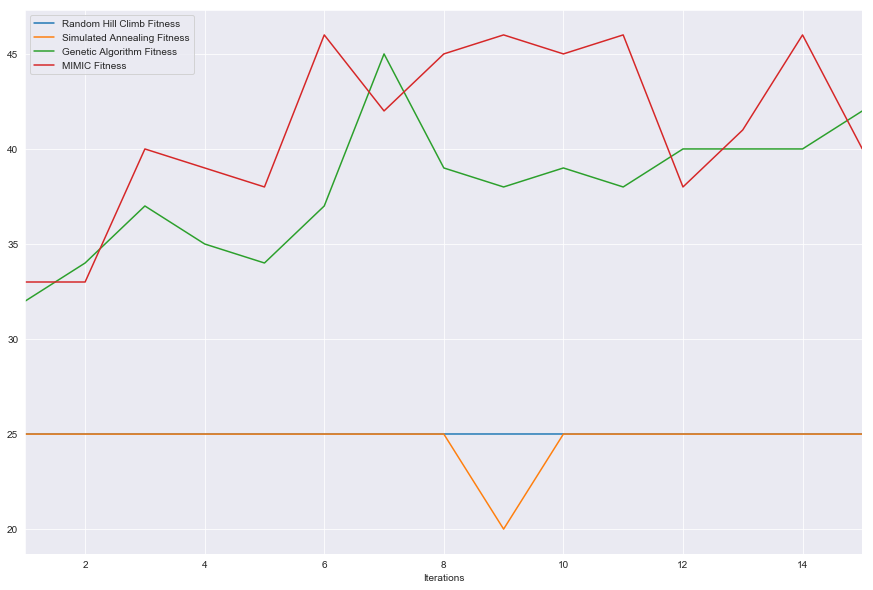

In [250]:
df.plot(figsize=(15,10), x='Iterations')

#### Continuous Peaks

In [539]:
fitness = mlrose.ContinuousPeaks()

In [540]:
problem = mlrose.DiscreteOpt(length=25, fitness_fn=fitness, maximize=True)
init_state = np.zeros(25)
schedule = mlrose.ExpDecay()

In [511]:
algos = ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic']
df = pd.DataFrame()

best_rh = []
best_sa = []
best_ga = []
best_mimic = []
rng = range(5,51,5)

for i in rng:
    np.random.seed(42)
    best_state_rh, best_fitness_rh = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_ga, best_fitness_ga = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i)
    best_state_mimic, best_fitness_mimic = mlrose.mimic(problem, max_attempts=100, max_iters=i)
    
    best_rh.append(best_fitness_rh)
    best_sa.append(best_fitness_sa)
    best_ga.append(best_fitness_ga)
    best_mimic.append(best_fitness_mimic)
    
df['Iterations'] = rng
df['Random Hill Climb Fitness'] = best_rh
df['Simulated Annealing Fitness'] = best_sa
df['Genetic Algorithm Fitness'] = best_ga
df['MIMIC Fitness'] = best_mimic

df

,Iterations,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
0,5,25.0,22.0,38.0,42.0
1,10,25.0,15.0,41.0,44.0
2,15,25.0,21.0,42.0,38.0
3,20,25.0,12.0,39.0,39.0
4,25,25.0,20.0,41.0,44.0
5,30,25.0,24.0,42.0,42.0
6,35,25.0,25.0,41.0,39.0
7,40,25.0,25.0,41.0,37.0
8,45,25.0,23.0,42.0,45.0
9,50,25.0,23.0,39.0,42.0


In [513]:
df.index = df['Iterations']
df.drop('Iterations', inplace=True, axis=1)
df

,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
Iterations,,,,
5,25.0,22.0,38.0,42.0
10,25.0,15.0,41.0,44.0
15,25.0,21.0,42.0,38.0
20,25.0,12.0,39.0,39.0
25,25.0,20.0,41.0,44.0
30,25.0,24.0,42.0,42.0
35,25.0,25.0,41.0,39.0
40,25.0,25.0,41.0,37.0
45,25.0,23.0,42.0,45.0


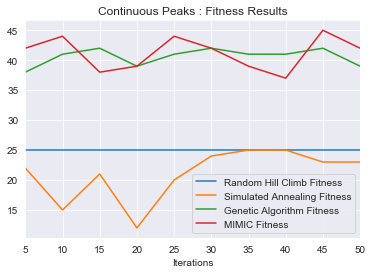

In [515]:
df.plot(title='Continuous Peaks : Fitness Results')

In [541]:
df = pd.DataFrame()

best_50 = []
best_100 = []
best_200 = []
best_500 = []
rng = range(5,51,5)

for i in rng:
    np.random.seed(42)
    best_state_50, best_fitness_50 = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i, pop_size=50)
    best_state_100, best_fitness_100 = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i, pop_size=100)
    best_state_200, best_fitness_200 = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i, pop_size=200)
    best_state_500, best_fitness_500 = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i, pop_size=500)

    
    best_50.append(best_fitness_50)
    best_100.append(best_fitness_100)
    best_200.append(best_fitness_200)
    best_500.append(best_fitness_500)
    
df['Iterations'] = rng
df['Population = 50'] = best_50
df['Population = 100'] = best_100
df['Population = 200'] = best_200
df['Population = 500'] = best_500

df

,Iterations,Population = 50,Population = 100,Population = 200,Population = 500
0,5,35.0,38.0,41.0,38.0
1,10,35.0,38.0,38.0,38.0
2,15,35.0,39.0,40.0,40.0
3,20,37.0,39.0,40.0,43.0
4,25,40.0,39.0,38.0,42.0
5,30,40.0,43.0,39.0,44.0
6,35,40.0,42.0,42.0,43.0
7,40,40.0,42.0,42.0,44.0
8,45,40.0,41.0,41.0,42.0
9,50,40.0,41.0,42.0,46.0


In [542]:
df.index = df['Iterations']
df.drop('Iterations', axis=1, inplace=True)
df

,Population = 50,Population = 100,Population = 200,Population = 500
Iterations,,,,
5,35.0,38.0,41.0,38.0
10,35.0,38.0,38.0,38.0
15,35.0,39.0,40.0,40.0
20,37.0,39.0,40.0,43.0
25,40.0,39.0,38.0,42.0
30,40.0,43.0,39.0,44.0
35,40.0,42.0,42.0,43.0
40,40.0,42.0,42.0,44.0
45,40.0,41.0,41.0,42.0


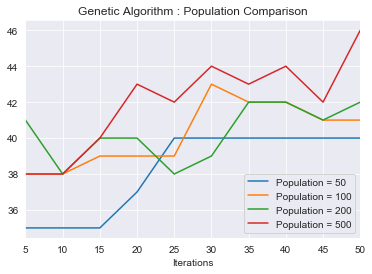

In [544]:
df.plot(title='Genetic Algorithm : Population Comparison')

In [546]:
df = pd.DataFrame()

best_1 = []
best_3 = []
best_5 = []
best_7 = []
rng = range(1,10)

for i in rng:
    np.random.seed(42)
    best_state_1, best_fitness_1 = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i, mutation_prob=0.1)
    best_state_3, best_fitness_3 = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i, mutation_prob=0.3)
    best_state_5, best_fitness_5 = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i, mutation_prob=0.5)
    best_state_7, best_fitness_7 = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i, mutation_prob=0.7)

    
    best_1.append(best_fitness_1)
    best_3.append(best_fitness_3)
    best_5.append(best_fitness_5)
    best_7.append(best_fitness_7)
    
df['Iterations'] = rng
df['p(Mutate) = 0.1'] = best_1
df['p(Mutate) = 0.3'] = best_3
df['p(Mutate) = 0.5'] = best_5
df['p(Mutate) = 0.7'] = best_7

df

,Iterations,p(Mutate) = 0.1,p(Mutate) = 0.3,p(Mutate) = 0.5,p(Mutate) = 0.7
0,1,38.0,38.0,34.0,35.0
1,2,38.0,36.0,34.0,38.0
2,3,38.0,39.0,36.0,36.0
3,4,38.0,38.0,38.0,36.0
4,5,38.0,40.0,36.0,37.0
5,6,38.0,37.0,35.0,38.0
6,7,38.0,37.0,36.0,38.0
7,8,43.0,37.0,37.0,37.0
8,9,43.0,38.0,39.0,39.0


In [547]:
df.index = df['Iterations']
df.drop('Iterations', axis=1, inplace=True)
df

,p(Mutate) = 0.1,p(Mutate) = 0.3,p(Mutate) = 0.5,p(Mutate) = 0.7
Iterations,,,,
1,38.0,38.0,34.0,35.0
2,38.0,36.0,34.0,38.0
3,38.0,39.0,36.0,36.0
4,38.0,38.0,38.0,36.0
5,38.0,40.0,36.0,37.0
6,38.0,37.0,35.0,38.0
7,38.0,37.0,36.0,38.0
8,43.0,37.0,37.0,37.0
9,43.0,38.0,39.0,39.0


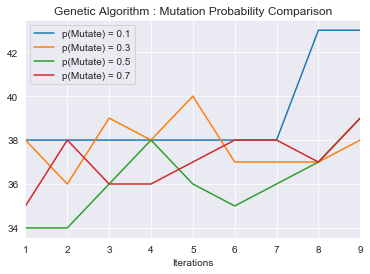

In [548]:
df.plot(title='Genetic Algorithm : Mutation Probability Comparison')

#### Knapsack

In [527]:
np.random.seed(42)
weights = np.random.randint(1,101,25)
values = np.random.randint(1,101,25)
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)

In [528]:
items_df = pd.DataFrame()
items_df['Item'] = ['Item_'+str(i) for i in range(25)]
items_df['Weight'] = weights
items_df['Value'] = values
items_df

,Item,Weight,Value
0,Item_0,52,76
1,Item_1,93,58
2,Item_2,15,22
3,Item_3,72,89
4,Item_4,61,49
5,Item_5,21,91
6,Item_6,83,59
7,Item_7,87,42
8,Item_8,75,92
9,Item_9,75,60


In [529]:
items_df.index = items_df['Item']
items_df.drop('Item', axis=1, inplace=True)
items_df

,Weight,Value
Item,,
Item_0,52,76
Item_1,93,58
Item_2,15,22
Item_3,72,89
Item_4,61,49
Item_5,21,91
Item_6,83,59
Item_7,87,42
Item_8,75,92


In [530]:
problem = mlrose.DiscreteOpt(length=25, fitness_fn=fitness, maximize=True)
init_state = np.zeros(25)
schedule = mlrose.ExpDecay()

In [499]:
algos = ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic']
df = pd.DataFrame()

best_rh = []
best_sa = []
best_ga = []
best_mimic = []
rng = range(5,51,5)

for i in rng:
    np.random.seed(42)
    best_state_rh, best_fitness_rh = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_ga, best_fitness_ga = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i)
    best_state_mimic, best_fitness_mimic = mlrose.mimic(problem, max_attempts=100, max_iters=i)
    
    best_rh.append(best_fitness_rh)
    best_sa.append(best_fitness_sa)
    best_ga.append(best_fitness_ga)
    best_mimic.append(best_fitness_mimic)
    
df['Iterations'] = rng
df['Random Hill Climb Fitness'] = best_rh
df['Simulated Annealing Fitness'] = best_sa
df['Genetic Algorithm Fitness'] = best_ga
df['MIMIC Fitness'] = best_mimic

df

,Iterations,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
0,5,231.0,275.0,1007.0,1122.0
1,10,367.0,499.0,1031.0,1129.0
2,15,529.0,561.0,1017.0,1116.0
3,20,616.0,821.0,1016.0,1129.0
4,25,707.0,749.0,1046.0,1129.0
5,30,783.0,781.0,1045.0,1125.0
6,35,834.0,730.0,1043.0,1129.0
7,40,834.0,845.0,1072.0,1124.0
8,45,834.0,806.0,1055.0,1100.0
9,50,834.0,704.0,1044.0,1128.0


In [502]:
df.index = df['Iterations']
df.drop('Iterations', inplace=True, axis=1)
df

,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
Iterations,,,,
5,231.0,275.0,1007.0,1122.0
10,367.0,499.0,1031.0,1129.0
15,529.0,561.0,1017.0,1116.0
20,616.0,821.0,1016.0,1129.0
25,707.0,749.0,1046.0,1129.0
30,783.0,781.0,1045.0,1125.0
35,834.0,730.0,1043.0,1129.0
40,834.0,845.0,1072.0,1124.0
45,834.0,806.0,1055.0,1100.0


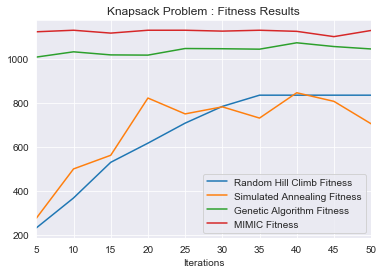

In [501]:
df.plot(title='Knapsack Problem : Fitness Results', x='Iterations')

In [531]:
df = pd.DataFrame()

best_50 = []
best_100 = []
best_200 = []
best_500 = []
rng = range(5,51,5)

for i in rng:
    np.random.seed(42)
    best_state_50, best_fitness_50 = mlrose.mimic(problem, max_attempts=100, max_iters=i, pop_size=50)
    best_state_100, best_fitness_100 = mlrose.mimic(problem, max_attempts=100, max_iters=i, pop_size=100)
    best_state_200, best_fitness_200 = mlrose.mimic(problem, max_attempts=100, max_iters=i, pop_size=200)
    best_state_500, best_fitness_500 = mlrose.mimic(problem, max_attempts=100, max_iters=i, pop_size=500)

    
    best_50.append(best_fitness_50)
    best_100.append(best_fitness_100)
    best_200.append(best_fitness_200)
    best_500.append(best_fitness_500)
    
df['Iterations'] = rng
df['Population = 50'] = best_50
df['Population = 100'] = best_100
df['Population = 200'] = best_200
df['Population = 500'] = best_500

df

,Iterations,Population = 50,Population = 100,Population = 200,Population = 500
0,5,1043.0,1129.0,1129.0,1129.0
1,10,1043.0,1112.0,1128.0,1129.0
2,15,1043.0,1122.0,1129.0,1129.0
3,20,1043.0,1107.0,1112.0,1129.0
4,25,1043.0,1102.0,1087.0,1129.0
5,30,1043.0,1089.0,1129.0,1128.0
6,35,1043.0,1052.0,1129.0,1129.0
7,40,1043.0,1053.0,1129.0,1129.0
8,45,1043.0,1086.0,1128.0,1125.0
9,50,1043.0,1087.0,1129.0,1129.0


In [533]:
df.index = df['Iterations']
df.drop('Iterations', axis=1, inplace=True)
df

,Population = 50,Population = 100,Population = 200,Population = 500
Iterations,,,,
5,1043.0,1129.0,1129.0,1129.0
10,1043.0,1112.0,1128.0,1129.0
15,1043.0,1122.0,1129.0,1129.0
20,1043.0,1107.0,1112.0,1129.0
25,1043.0,1102.0,1087.0,1129.0
30,1043.0,1089.0,1129.0,1128.0
35,1043.0,1052.0,1129.0,1129.0
40,1043.0,1053.0,1129.0,1129.0
45,1043.0,1086.0,1128.0,1125.0


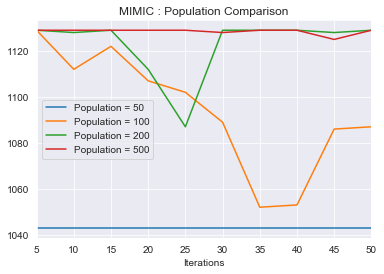

In [534]:
df.plot(title='MIMIC : Population Comparison')

In [536]:
df = pd.DataFrame()

best_1 = []
best_3 = []
best_5 = []
best_7 = []
rng = range(1,10)

for i in rng:
    np.random.seed(42)
    best_state_1, best_fitness_1 = mlrose.mimic(problem, max_attempts=100, max_iters=i, keep_pct=0.1)
    best_state_3, best_fitness_3 = mlrose.mimic(problem, max_attempts=100, max_iters=i, keep_pct=0.3)
    best_state_5, best_fitness_5 = mlrose.mimic(problem, max_attempts=100, max_iters=i, keep_pct=0.5)
    best_state_7, best_fitness_7 = mlrose.mimic(problem, max_attempts=100, max_iters=i, keep_pct=0.7)

    
    best_1.append(best_fitness_1)
    best_3.append(best_fitness_3)
    best_5.append(best_fitness_5)
    best_7.append(best_fitness_7)
    
df['Iterations'] = rng
df['Keep 10%'] = best_1
df['Keep 30%'] = best_3
df['Keep 50%'] = best_5
df['Keep 70%'] = best_7

df

,Iterations,Keep 10%,Keep 30%,Keep 50%,Keep 70%
0,1,1033.0,1048.0,957.0,911.0
1,2,1095.0,1034.0,1027.0,907.0
2,3,1128.0,1060.0,1031.0,984.0
3,4,1129.0,1085.0,1029.0,1003.0
4,5,1129.0,1116.0,1082.0,993.0
5,6,1129.0,1127.0,1068.0,1001.0
6,7,1129.0,1129.0,1079.0,1038.0
7,8,1129.0,1125.0,1085.0,1056.0
8,9,1129.0,1129.0,1086.0,1054.0


In [537]:
df.index = df['Iterations']
df.drop('Iterations', axis=1, inplace=True)
df

,Keep 10%,Keep 30%,Keep 50%,Keep 70%
Iterations,,,,
1,1033.0,1048.0,957.0,911.0
2,1095.0,1034.0,1027.0,907.0
3,1128.0,1060.0,1031.0,984.0
4,1129.0,1085.0,1029.0,1003.0
5,1129.0,1116.0,1082.0,993.0
6,1129.0,1127.0,1068.0,1001.0
7,1129.0,1129.0,1079.0,1038.0
8,1129.0,1125.0,1085.0,1056.0
9,1129.0,1129.0,1086.0,1054.0


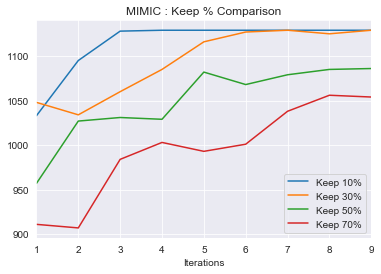

In [538]:
df.plot(title='MIMIC : Keep % Comparison')

#### FlipFlop

In [235]:
fitness = mlrose.FlipFlop()

In [236]:
problem = mlrose.DiscreteOpt(length=25, fitness_fn=fitness, maximize=True)
init_state = np.zeros(25)
schedule = mlrose.ExpDecay()

In [237]:
algos = ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic']
df = pd.DataFrame()

best_rh = []
best_sa = []
best_ga = []
best_mimic = []
rng = range(1,16)

for i in rng:
    best_state_rh, best_fitness_rh = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_ga, best_fitness_ga = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i)
    best_state_mimic, best_fitness_mimic = mlrose.mimic(problem, max_attempts=100, max_iters=i)
    
    best_rh.append(best_fitness_rh)
    best_sa.append(best_fitness_sa)
    best_ga.append(best_fitness_ga)
    best_mimic.append(best_fitness_mimic)
    
df['Iterations'] = rng
df['Random Hill Climb Fitness'] = best_rh
df['Simulated Annealing Fitness'] = best_sa
df['Genetic Algorithm Fitness'] = best_ga
df['MIMIC Fitness'] = best_mimic

df

,Iterations,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
0,1,2.0,1.0,20.0,20.0
1,2,4.0,4.0,18.0,20.0
2,3,6.0,5.0,19.0,23.0
3,4,5.0,6.0,19.0,22.0
4,5,8.0,8.0,20.0,23.0
5,6,11.0,8.0,21.0,24.0
6,7,11.0,12.0,20.0,24.0
7,8,12.0,11.0,20.0,23.0
8,9,11.0,10.0,20.0,22.0
9,10,14.0,12.0,20.0,24.0


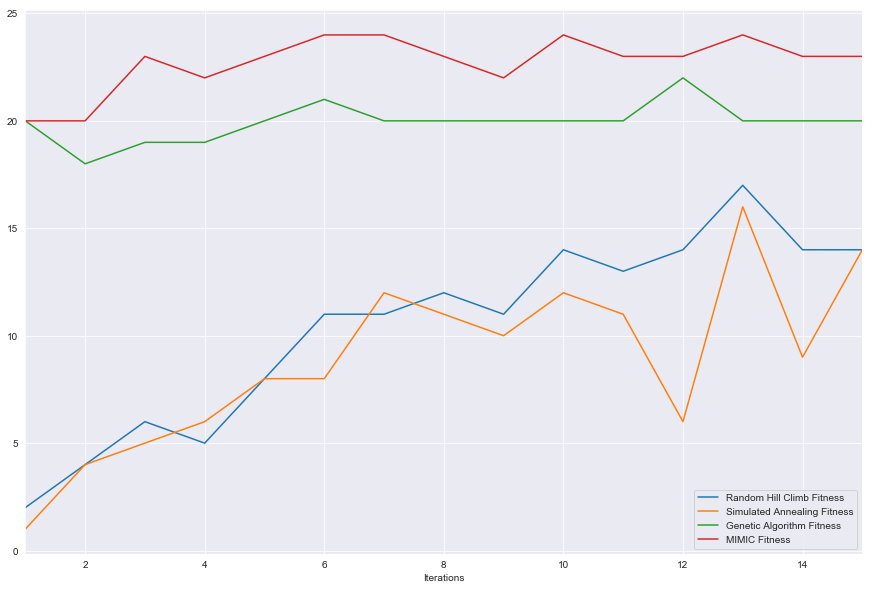

In [238]:
df.plot(figsize=(15,10), x='Iterations')

#### OneMax

In [239]:
fitness = mlrose.OneMax()

In [240]:
problem = mlrose.DiscreteOpt(length=25, fitness_fn=fitness, maximize=True)
init_state = np.zeros(25)
schedule = mlrose.ExpDecay()

In [241]:
algos = ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic']
df = pd.DataFrame()

best_rh = []
best_sa = []
best_ga = []
best_mimic = []
rng = range(1,16)

for i in rng:
    best_state_rh, best_fitness_rh = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=i, init_state=init_state)
    best_state_ga, best_fitness_ga = mlrose.genetic_alg(problem, max_attempts=100, max_iters=i)
    best_state_mimic, best_fitness_mimic = mlrose.mimic(problem, max_attempts=100, max_iters=i)
    
    best_rh.append(best_fitness_rh)
    best_sa.append(best_fitness_sa)
    best_ga.append(best_fitness_ga)
    best_mimic.append(best_fitness_mimic)
    
df['Iterations'] = rng
df['Random Hill Climb Fitness'] = best_rh
df['Simulated Annealing Fitness'] = best_sa
df['Genetic Algorithm Fitness'] = best_ga
df['MIMIC Fitness'] = best_mimic

df

,Iterations,Random Hill Climb Fitness,Simulated Annealing Fitness,Genetic Algorithm Fitness,MIMIC Fitness
0,1,1.0,1.0,19.0,23.0
1,2,1.0,2.0,20.0,23.0
2,3,3.0,3.0,20.0,24.0
3,4,4.0,3.0,20.0,25.0
4,5,5.0,5.0,21.0,25.0
5,6,6.0,6.0,21.0,25.0
6,7,6.0,6.0,21.0,25.0
7,8,6.0,8.0,21.0,25.0
8,9,9.0,6.0,21.0,25.0
9,10,9.0,8.0,21.0,25.0


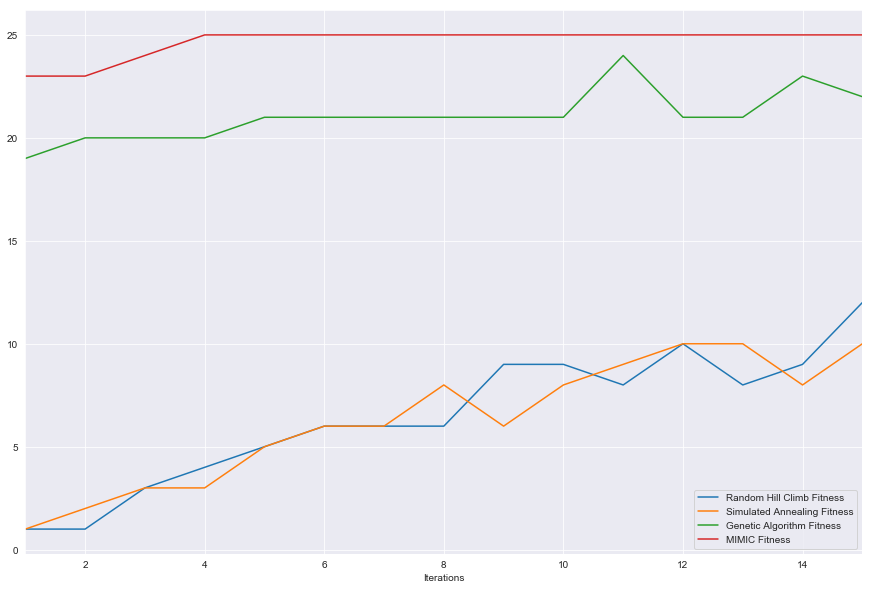

In [242]:
df.plot(figsize=(15,10), x='Iterations')